# Codice prof con appunti

## Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris

In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

### Ricordiamo com'è fatto il dataset *iris*

Composto da 2 array, il primo è composto da 150 array, ogni elemento è una tupla di 4 valori che contiene i valori delle feature del dataset. Il secondo array contiene i valori delle etichette del dataset.

### Parliamo del valore "cv" nel metodo cross_val_score(). 

La **cross validation** è un approccio che ci permette di testare le performance del nostro modello. Nel caso più semplice basta testare il modello su una parte del dataset (*training_set*), e poi valutare la performance del modello sull'altra parte (*test_set*).

In questo caso invece usiamo il concetto di ***K-folds*** che consiste nel dividere il dataset in $k$ parti e di usarne $k-1$ per addrestare il modello, ed usare la porzione rimanente per valutare le performance del modello. Si ripete questa operazione su tutti i folds in modo da ottenere una media delle performance del modello.
Di solito cv non si setta ad un valore troppo basso nè ad un valore troppo altro, di solito è compreso tra 5 e 10. Di default è uguale a 3.

`The higher value of K leads to less biased model (but large variance might lead to over-fit), where as the lower value of K is similar to the train-test split approach we saw before.`

The following cell shows the program training a decision tree and its results in prediction .

In [44]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test

iris = load_iris()

clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)

scores_tree = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores_tree)

# print the mean of the scores
print(scores_tree.mean())

[0.96666667 1.         0.86666667 0.86666667 1.        ]
0.9400000000000001


Alleniamo il modello con l'algoritmo k-nearest neighbors. Usiamo come parametro ***weight = 'uniform'*** che sta ad indicare che tutti i k vicini hanno lo stesso peso nella valutazione della predizione.

In [45]:
from sklearn import neighbors

n_neighbors = 11 # this is the k value

clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)

scores_knn = cross_val_score(clf_knn, iris.data, iris.target, cv=5) # score will be the accuracy

print(scores_knn)
# print the mean of the scores
print(scores_knn.mean())

[0.93333333 1.         1.         0.96666667 1.        ]
0.9800000000000001


Stampiamo i risultati delle predizioni fatte errate

In [46]:
for i in range(len(iris.target)):
    
    instance = (iris.data[i,:]).reshape(1, -1)
    predicted = clf_knn.predict(instance)[0] # [0] = best class
    if iris.target[i] == predicted:
        pass # Do not print the values
        # print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i) + " NOT OK " + "true class: " + 
              str(iris.target_names[iris.target[i]]) + 
              "; predicted: " + str(iris.target_names[predicted]))
        
print("\nKNN performance: " + str(scores_knn) + "\nMedia: " + str(scores_knn.mean()))
print("\nTree performance: " + str(scores_tree) + "\nMedia: " +  str(scores_tree.mean()))

77 NOT OK true class: versicolor; predicted: virginica
83 NOT OK true class: versicolor; predicted: virginica
106 NOT OK true class: virginica; predicted: versicolor
138 NOT OK true class: virginica; predicted: versicolor

KNN performance: [0.93333333 1.         1.         0.96666667 1.        ]
Media: 0.9800000000000001

Tree performance: [0.96666667 1.         0.86666667 0.86666667 1.        ]
Media: 0.9400000000000001


Possiamo notare che k-nn performa meglio dei decision trees, con un valore di k = 11.

***weights='distance'***: Nell'esempio seguente usiamo il peso inversamente proporzionale alla distanza tra l'istanza di test e il vicino. In questo modo i dati più vicini avranno un peso maggiore rispetto a quelli lontani.

In [47]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

for i in range(len(iris.target)):
    instance = (iris.data[i,:]).reshape(1, -1)
    predicted2 = clf_knn2.predict(instance)[0]
    if iris.target[i] == predicted2:
        pass # Do not print the values
        # print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
    else:
        print(str(i) + " NOT OK " + "true class: " + str(iris.target_names[iris.target[i]]) + 
              "; predicted: " + str(iris.target_names[predicted]))

Possiamo notare che vengono classificati tutti bene fli esempi di test. 

Stampiamo gli scores e vediamo come si comporta la cross-validation.

In [48]:
print("Classification score of k-nn with distance weighting\n")
scores_knn2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5) # score will be the accuracy
print("Scores: ", scores_knn2)
print("Media score: ", scores_knn2.mean())

Classification score of k-nn with distance weighting

Scores:  [0.96666667 1.         1.         0.96666667 1.        ]
Media score:  0.9866666666666667


**N.B.** : tutti gli esempi sono classificati bene sull'intero set, ma con la cross validation vengono commessi errori (1 errore su due dei 5 fold) perchè non tutti sono usati per il training!

### Proviamo a fare tuning del modello per trovare il miglior valore di K

In [49]:
import numpy as np
from numpy import zeros
from sklearn import neighbors
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

best_accuracy = 0
best_k = 1

A = np.zeros(len(y_train), dtype=float) # for storing accuracies

In [51]:
for n_neighbors in np.arange(1, len(y_train)+1):
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
    
    clf_knn3.fit(X_train, y_train)
    index = n_neighbors - 1
    A[index] = clf_knn3.score(X_test, y_test)
    if (best_accuracy < clf_knn3.score(X_test, y_test)):
        best_accuracy = clf_knn3.score(X_test, y_test)
        best_k = n_neighbors

Stampiamo i risultati del K migliore trovato

best k = 7
best accuracy = 0.9666666666666667


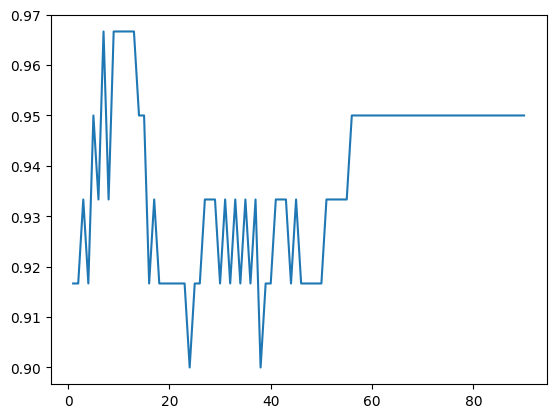

In [52]:
print("best k = " + str(best_k))
print("best accuracy = " + str(best_accuracy))

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# plt.xticks(np.arange(1, len(y_train)+1, 8))
plt.yticks(np.arange(0.0,1.0,0.01))

plt.plot(np.arange(1,len(y_train)+1),A)

plt.show()

### Conclusioni

Vediamo come aumentando il k di tanto l'accuracy cala: ciò accade perchè k troppo alti non danno predizioni significative, esattamente come k troppo bassi

Ora cerchiamo di fare lo stesso tipo di tuning però sia con il modello che pesa le distanze che con il modello che considera i k neighbour tutti allo stesso modo

Weighting: uniform

Best k = 7

Best accuracy = 0.9666666666666667
Weighting: distance

Best k = 7

Best accuracy = 0.9666666666666667


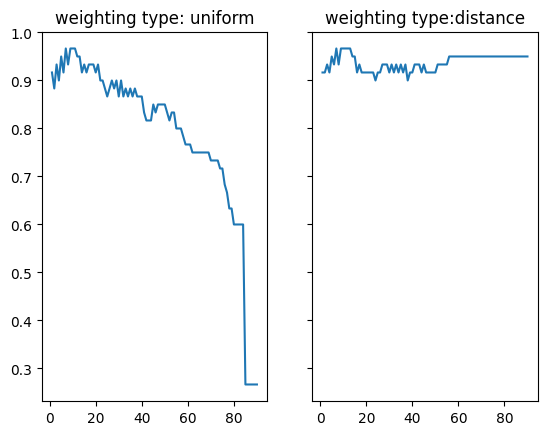

In [53]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

i = 0  # parameter in the control of the subplot to draw on'
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for weight_type in ['uniform', 'distance']:
    print("Weighting: " + str(weight_type))
    A = np.zeros(len(y_train), dtype = float) # for storing accuracies
    best_accuracy = 0
    best_k = 1
    
    for n_neighbors in np.arange(1,len(y_train)+1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights = weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index = n_neighbors - 1
        A[index] = clf_knn2.score(X_test, y_test)
        
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors
            
    print("\nBest k = " + str(best_k))
    print("\nBest accuracy = " + str(best_accuracy))
    
    if i == 0:
        ax1.plot(np.arange(1, len(y_train) + 1), A)
        ax1.set_title('weighting type: ' + str(weight_type))
    else:
        ax2.plot(np.arange(1, len(y_train) +1), A)
        ax2.set_title('weighting type:' + str(weight_type))
        
    i = i + 1

plt.show()


Ora plottiamo i due grafici sullo stesso grafico per osservarne meglio i risultati


Weighting : uniform

Best k = 7

Best accuracy = 0.9666666666666667

Weighting : distance

Best k = 7

Best accuracy = 0.9666666666666667


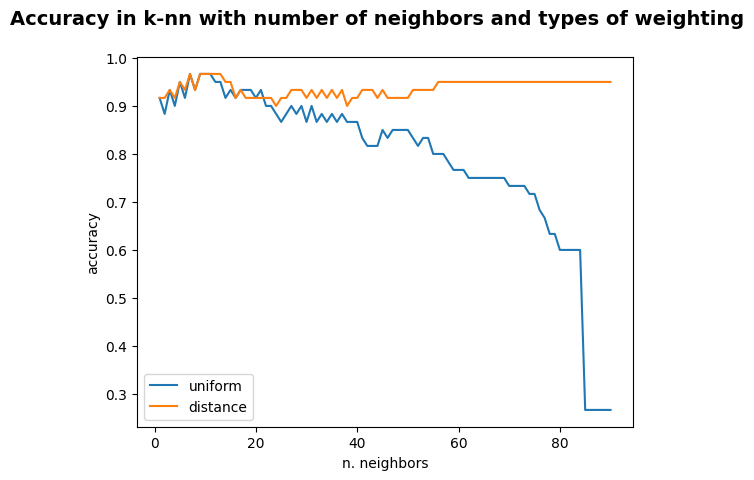

In [54]:
fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

A = np.zeros((len(y_train),2), dtype = float) # 2 arrays for storing accuracies for each type of weigthing
i = 0  #parameter in the control of the different diagram (=matrix A column index)
best_accuracy = 0

for weight_type in ['uniform', 'distance']:
    print("\nWeighting : " + str(weight_type))
    best_accuracy = 0
    best_k = 1
    
    for n_neighbors in np.arange(1, len(y_train) + 1):
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights = weight_type)
        # (n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1, **kwargs)
        clf_knn2.fit(X_train, y_train)
        index = n_neighbors - 1 # computes the matrix row index
        A[index,i] = clf_knn2.score(X_test, y_test)
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors
    
    print("\nBest k = " + str(best_k))
    print("\nBest accuracy = " + str(best_accuracy))
    plt.plot(np.arange(1, len(y_train) + 1), A[:,i])
    i = i + 1
    
plt.legend(['uniform', 'distance'], loc = 'lower left')  
plt.show()

### Plot the Iris dataset, in 2-D, with a red color for Setosa, blu for Versicolor, Green for Virginica.

**Tip:**

Per comporre il grafico in 2D dobbiamo scegliere due tra le 4 feature presenti nel dataset e assegnare un colore ad ogni classe.

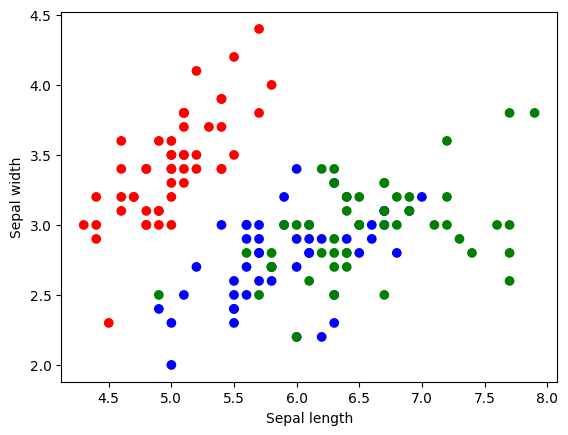

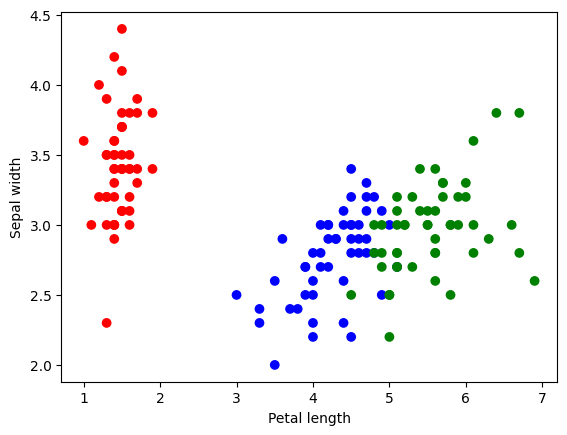

In [55]:
colors = [0] * len(iris.data) # array of zeros
for i in range(len(iris.data)):
    if iris.target[i] == 0:     # setosa
        colors[i] = 'r'
    elif iris.target[i] == 1:   # versicolor
        colors[i] = 'b'
    else:                       #virginica
        colors[i] = 'g'
        
plt.scatter(iris.data[:,0], iris.data[:,1], c = colors)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

plt.scatter(iris.data[:,2], iris.data[:,1], c=colors)
plt.xlabel('Petal length')
plt.ylabel('Sepal width')
plt.show()

### Conclusion

Notiamo bene come per il modello che pesa le distanze l'accuraccy rimane alta anche con k vicino a N, perchè i "vicini lontani" conteranno pochissimo, come se non li considerassimo; invece per il modello uniforme scende molto perchè stiamo considerando i "vicini lontani" allo stesso modo dei "vicini vicini"

# Esercizi

### Carichiamo il dataset e alleniamo il modello utilizzando 2 weight function diverse

In [56]:
# Load the dataset
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
from sklearn import neighbors 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

n_neighbors = 7 # Use the best k from the previous diagram

# Use the cross validation to avoid overfitting
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)

# Uniform based version of classifier
clf_knn_uniform = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn_uniform.fit(X_train, y_train)
prediction_uniform = clf_knn_uniform.predict(X_test)

# Distance based version of classifier
clf_knn_distance = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn_distance.fit(X_train, y_train)
prediction_distance = clf_knn_distance.predict(X_test)

### 1. Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation

Effettuiamo le predizioni con *uniform weighting*

In [57]:
colors_uni = [0] * len(prediction_uniform) # array of zeros
err_uni = 0

for i in range(len(prediction_uniform)):
    if prediction_uniform[i] == y_test[i] and prediction_uniform[i] == 0:   # setosa
        colors_uni[i] = 'r'
    elif prediction_uniform[i] == y_test[i] and prediction_uniform[i] == 1: # versicolor
        colors_uni[i] = 'b'
    elif prediction_uniform[i] == y_test[i] and prediction_uniform[i] == 2: # virginica 
        colors_uni[i] = 'g'
    else:
        err_uni = err_uni + 1
        colors_uni[i] = 'y' # prediction error

Effettuiamo le predizioni con *distance weighting*

In [58]:
colors_dist = [0]*len(prediction_distance) #array of zeros
err_weg = 0

for i in range(len(prediction_distance)):
    if prediction_distance[i] == y_test[i] and prediction_distance[i] == 0: # setosa
        colors_dist[i] = 'r'
    elif prediction_distance[i] == y_test[i] and prediction_distance[i] == 1: # versicolor
        colors_dist[i] = 'b'
    elif prediction_distance[i] == y_test[i] and prediction_distance[i] == 2: # virginica 
        colors_dist[i] = 'g'
    else:
        err_weg = err_weg + 1
        colors_dist[i] = 'y' # prediction error

E infine stampiamo i risultati reali presi dal dataset, ovvero i risutati che ci aspettiamo nelle predizioni effettuate sopra

In [59]:
colors_exp = [0] * len(y_test)    # array of zeros
for i in range(len(y_test)):
    if y_test[i] == 0:            # setosa
        colors_exp[i] = 'r'
    elif y_test[i] == 1:          # versicolor
        colors_exp[i] = 'b'
    else:                       # virginica
        colors_exp[i] = 'g'

#### Stampiamo i grafici

Stampiamo i risultati per lo *uniform* weighting

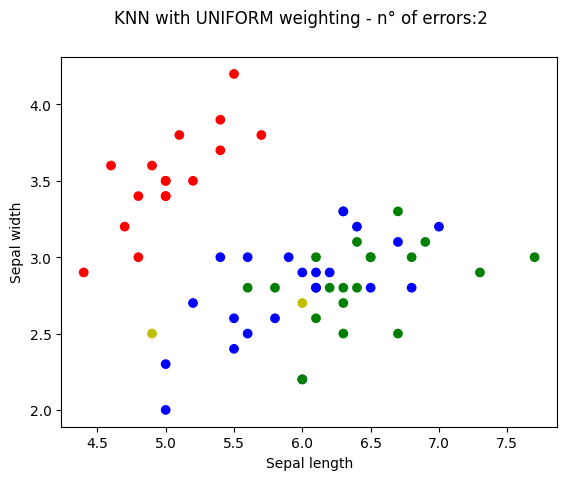

In [60]:
plt.suptitle('KNN with UNIFORM weighting - n° of errors:' + str(err_uni))
plt.scatter(X_test[:,0], X_test[:,1], c = colors_uni)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Plot the result for the distance weighting

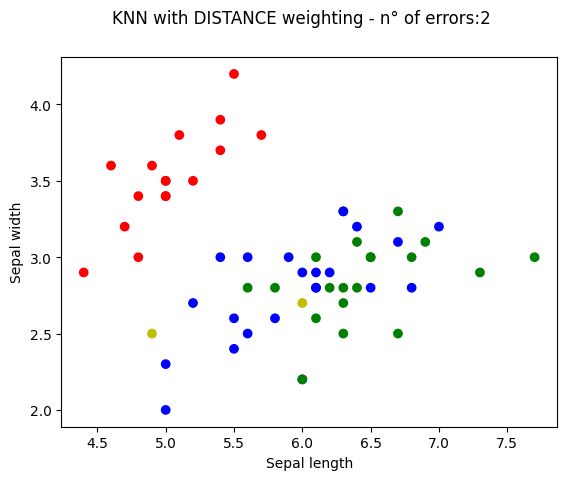

In [61]:
plt.suptitle('KNN with DISTANCE weighting - n° of errors:'+str(err_weg))
plt.scatter(X_test[:,0], X_test[:,1], c=colors_dist)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

Plot the result for the expected results

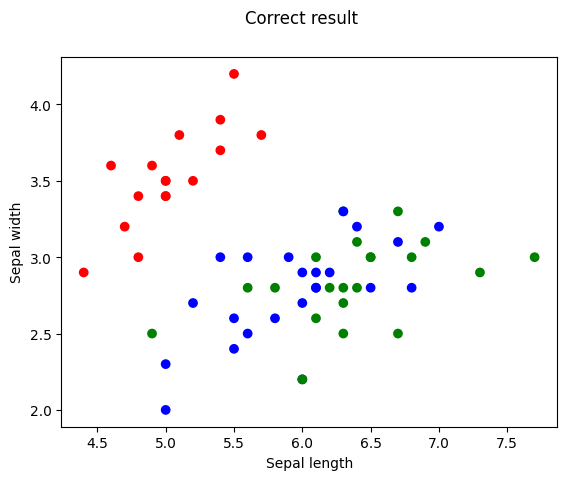

In [62]:
plt.suptitle('Correct result')
plt.scatter(X_test[:,0], X_test[:,1], c=colors_exp)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

#### Stampiamo gli errori

In [63]:
print('Errors with uniform weighting: ' + str(err_uni))
print('Errors with distance weighting: ' + str(err_weg))

Errors with uniform weighting: 2
Errors with distance weighting: 2


**tip:**

Use the function predict_proba(X) to get the probability of each class for each instance in X.
We need to do that 3 times, so one for each class

### 2. Plot the ROC plot of the k-nn (for the best value of k) for each of the three classes: setosa, virginica and versicolor

Following the functions used in the previous exercises, we can plot the ROC curve for the k-nn and the decision tree.

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
import numpy as np

Convertiamo il dataset in binario, così da poter stampare la *ROC curve*

In [65]:
# y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) # Converte da [0,1,2] a [1,0,0] [0,1,0 [0,0,1] per le tre classi

def bin_convert(y, positive_label):
    # Return 1 if the label is true, 0 otherwise
    return np.where(y == positive_label, 1, 0)

def draw_3_roc_curves(y_test_setosa, predicted_y_test_setosa, y_test_versicolor, predicted_y_test_versicolor, 
                        y_test_virginica, predicted_y_test_virginica, name):
    
    plt.figure()
    fpr, tpr, _ = roc_curve(y_test_setosa, predicted_y_test_setosa)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label = "Setosa (area = %0.2f)" % roc_auc)
    
    fpr, tpr, _ = roc_curve(y_test_versicolor, predicted_y_test_versicolor)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="Versicolor (area = %0.2f)" % roc_auc)
    
    fpr, tpr, _ = roc_curve(y_test_virginica, predicted_y_test_virginica)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="Virginica (area = %0.2f)" % roc_auc)
    
    plt.plot([0, 1], [0, 1], "k")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
    plt.title("ROC knn with k = 7 " + name)
    plt.legend(loc = "lower right")
    plt.show()
    

def build_roc_plot_3_classes_binary(y_test, predicted_y_test, name):
    
    y_test_setosa = bin_convert(y_test, 0)
    predicted_y_test_setosa = bin_convert(predicted_y_test, 0)
    
    y_test_versicolor = bin_convert(y_test, 1)
    predicted_y_test_versicolor = bin_convert(predicted_y_test, 1)
    
    y_test_virginica = bin_convert(y_test, 2)
    predicted_y_test_virginica = bin_convert(predicted_y_test, 2)

    # print("Predictions on test set:", predicted_y_test,"(" + name + ")")
    # print("True classes:", y_test)
    # print("Errors (" + name + "):", np.array([0 if a == b else 1 for (a,b) in list(zip(predicted_y_test, y_test))]),"\n")

    # print("Predictions on test set - SETOSA:", predicted_y_test_setosa, "(" + name + ")")
    # print("True classes - SETOSA:", y_test_setosa)
    # print("Errors (" + name + "):", np.array([0 if a == b else 1 for (a,b) in list(zip(predicted_y_test_setosa, y_test_setosa))]),"\n")

    # print("Predictions on test set - VERSICOLOR:", predicted_y_test_versicolor,"(" + name + ")")
    # print("True classes - VERSICOLOR:", y_test_versicolor)
    # print("Errors (" + name + "):", np.array([0 if a == b else 1 for (a,b) in list(zip(predicted_y_test_versicolor, y_test_versicolor))]),"\n")
    
    # print("Predictions on test set - VIRGINICA:", predicted_y_test_virginica,"(" + name + ")")
    # print("True classes - VIRGINICA:", y_test_virginica)
    # print("Errors (" + name + "):", np.array([0 if a == b else 1 for (a,b) in list(zip(predicted_y_test_virginica, y_test_virginica))]))

    draw_3_roc_curves(y_test_setosa, predicted_y_test_setosa, y_test_versicolor, 
                      predicted_y_test_versicolor, y_test_virginica, predicted_y_test_virginica, name)

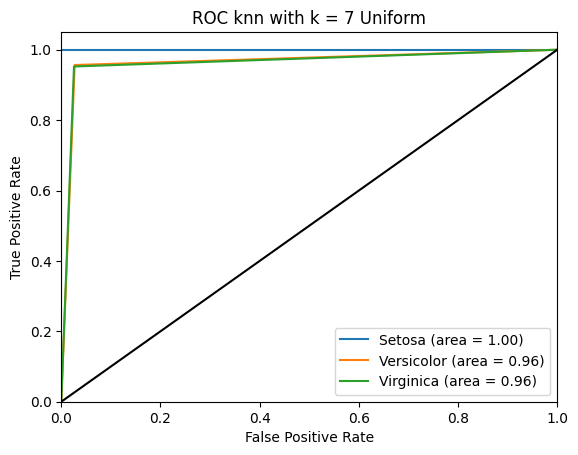

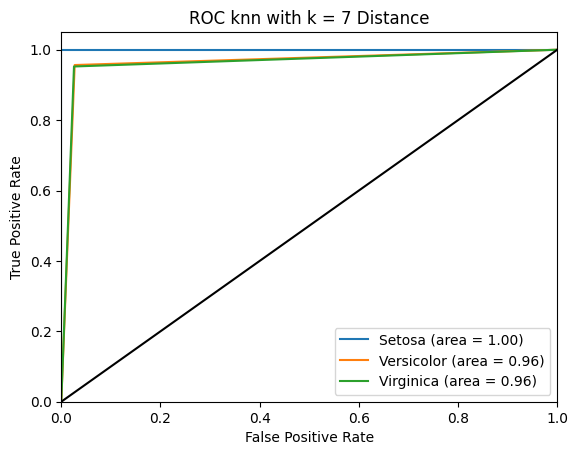

In [66]:
y_test_pred_uni = clf_knn_uniform.predict(X_test)
y_test_pred_dis = clf_knn_distance.predict(X_test)

build_roc_plot_3_classes_binary(y_test, y_test_pred_uni, "Uniform")
build_roc_plot_3_classes_binary(y_test, y_test_pred_dis, "Distance")

### 3. Plot the ROC plot for the best decision tree you trained in Exercize n.1  

In [67]:
WEIGHT_FACTOR_SETOSA = 1
WEIGHT_FACTOR_VERSICOLOR = 10
WEIGHT_FACTOR_VIRGINICA = 10
MIN_SAMPLES_LEAF = 5
MAX_LEAVES = 10
MAX_DEPTH = 10
MIN_IMPURITY = 0
CRITERION = 'entropy' #'gini'
TESTSET_SIZE = 20
INFLATION_FACTOR = 10   #1A
WEIGHT_FACTOR = 10      #1B
AVG = 'macro'

In [68]:
iris = load_iris()
X = iris.data
y = iris.target
np.random.seed(0)

indices = np.random.permutation(len(X))
indices_train = indices[:-TESTSET_SIZE]
indices_test = indices[-TESTSET_SIZE:]

X_train, y_train = X[indices_train], y[indices_train]
X_test, y_test = X[indices_test], y[indices_test]

X_train_inflated, y_train_inflated = X_train, y_train # Set con artificial inflation

In [69]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test

iris = load_iris()

clf_tree = tree.DecisionTreeClassifier(criterion = CRITERION, random_state = 0, min_samples_leaf = MIN_SAMPLES_LEAF, 
        max_depth = MAX_DEPTH, class_weight = {0 : WEIGHT_FACTOR_SETOSA, 1 : WEIGHT_FACTOR_VERSICOLOR, 
        2 : WEIGHT_FACTOR_VIRGINICA}, max_leaf_nodes = MAX_LEAVES, min_impurity_decrease = MIN_IMPURITY) 

clf_tree.fit(X_train_inflated, y_train_inflated)

scores_tree = cross_val_score(clf_tree, iris.data, iris.target, cv = 5) # score will be the accuracy
print(scores_tree)

# ritorna la media
print(scores_tree.mean())

[0.96666667 1.         0.86666667 0.86666667 1.        ]
0.9400000000000001


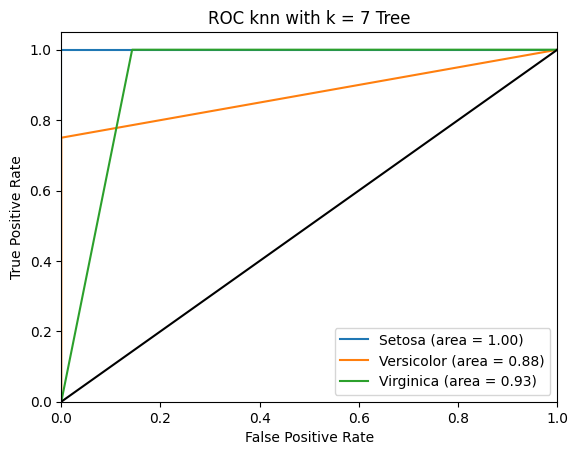

In [70]:
y_test_tree = clf_tree.predict(X_test)

build_roc_plot_3_classes_binary(y_test, y_test_tree, "Tree")

### 4. Compare decision trees and k-nn on the ROC space: for which values of (TPR,FPR) k-nn is better than decision trees?

Da scrivere una risposta su questa domanda

###  Es. 5 
In the following, extend the above exercize on k-nn using a kernel function K(x,y) for the distances computation, such that distance(x,y) = 1-K(x,y). Use a Gaussian-like (or Radial Basis Function) kernel K(x,y) = exp(-gamma(x-y)^2), with gamma the inverse of the sigma squared variance, that must be tuned to the best value according to the accuracy reached by the k-nn, with k = 7 (similarly as done with the previous example on tuning the parameter n_neightbors).

**tip:**

The kernel function is a function for evaluate the similarity, how we can use it for estimate the distance between two instances? By converting it: $(x,y)=1-K(x,y)$.
The prof suggest to use as similarity function the following:
- **kernel function**: $\exp(-\gamma(x-y)^2)$
- **Gaussian-like function**: $\exp(-\gamma(x-y)^2)$
- **Radial Basis Function**: $\exp(-\gamma(x-y)^2)$

gamma ($gamma$) is the parameter that must be tuned to the best value of the accuracy reached by the k-nn. It indicate how the distance is scaled and than used in the exponent.

Possiamo indicare una funzione per il parametro *weights* che ci permette di usare una funzione kernel per il calcolo delle distanze. In questo caso usiamo la funzione *gaussian*. 

Da sci-kit learn riguardo alla funzione da specificare: *a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.*

In [71]:
n_neighbors = 7 # uso il best k trovato in precedenza
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.4, random_state = 0)

In [72]:
def gaussian(sigma):
    def distance(dist):
        # arg = -(dist / (2 * (sigma ** 2)))
        arg = -(sigma * (dist ** 2))
        gauss = np.exp(arg)
        return gauss
    return distance

In [73]:
def isd():
    w= []
    for i in range(len(X_train)):
        # first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(X_test, X_train[i,:])))
        # add it to list of distances
        w.append([1/(np.square(distance)), i]) 
        return w

In [78]:
best_sigma = 0
best_accuracy = 0
best_clf = None
for s in np.linspace(0.01, 1, 100): #(10 - 0.01) / 100 = unit, 100 = len
    # clf = neighbors.KNeighborsClassifier(7, weights = gaussian(s), metric = "euclidean").fit(X_train, y_train)
    clf = neighbors.KNeighborsClassifier(7, weights = isd, metric = "euclidean").fit(X_train, y_train)
    if best_accuracy < clf.score(X_test, y_test):
        best_accuracy = clf.score(X_test, y_test)
        best_sigma = s
        best_clf = clf
    #print("sigma="+str(s))
    #print("accuracy="+str(clf.score(X_test, y_test)))
    
print("best accuracy: " + str(best_accuracy))
print("best s: " + str(best_sigma))

color = ['red' if t == 0 and t == y_test[i] 
                else 'blue'     if t == 1 and t == y_test[i] 
                else 'green'    if t == 2 and t == y_test[i] 
                else 'orange' 
        for i,t  in enumerate(clf.predict(X_test))]
        
sepal = X_test[:,0:2]
petals = X_test[:,2:4]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.set_figheight(6)
f.set_figwidth(16)

ax1.scatter(sepal[:,0], sepal[:,1], c=color)
ax1.set_xlabel("Sepal length")
ax1.set_ylabel("Sepal width")

ax2.scatter(petals[:,0], petals[:,1], c=color)
ax2.set_xlabel("Petals length")
ax2.set_ylabel("Petals width")

TypeError: isd() takes 0 positional arguments but 1 was given

Versione con rdf() scipy